# ITC 6001 - PROJECT - Introduction To Big Data #
## Drouvas Panagiotis, Dendrinos Theodoros, Kontoudakis Nikolaos ##

In [3]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
print(os.getcwd());
# change the following on your pc!
projectPath = "/home/nikos/Documents/6001_project"
dataPath = projectPath + "/ml-100k/u.data"
userPath = projectPath + "/ml-100k/u.user";

/home/nikos/Documents/6001_project


# Q1: Exploring the Data

## Read the data

In [9]:
uData = pd.read_csv(dataPath, sep= '\t', header= None, names=["userId", "itemId", "rating", "timestamp"])
pivotedData = uData.pivot(index="userId", columns="itemId", values="rating").reset_index().rename_axis(None, axis=1)

In [11]:
# #free testing area

# display(pivotedData[pivotedData.userId== 916])
# pivotedData.to_csv("export.csv", sep='\t', encoding='utf-8', index=False, header=True)
# diferentPivotMovies = uData.pivot(index="itemId", columns="userId", values="rating").reset_index().rename_axis(None, axis=1)
# display(pivotedData)
# print(diferentPivotMovies)

,userId,1,2,3,4,5,6,7,8,9,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Remove outliers ##

In [14]:
# #for movies (Already cleaned by the dataset submiter, no outliers)
# ratingsCount = diferentPivotMovies.drop(columns="itemId").notna().sum()
# ZScore = (ratingsCount - np.mean(ratingsCount)) / np.std(ratingsCount)
# # due to the reletivelly high z index, there will be no outliers detected?
# nonOutliers = ((ZScore > -3) & (ZScore < 3))
# nonOutliers = ratingsCount.index[nonOutliers]
# removedOutliers = diferentPivotMovies[["itemId"] + list(nonOutliers)]


# for users
ratingsCount = pivotedData.drop(columns="userId").notna().sum(axis= 1)
mu = np.mean(ratingsCount)
sigma = np.std(ratingsCount)
pivotedData['ZScore'] = ((ratingsCount - mu) / sigma)
removedOutliers = pivotedData[(pivotedData.ZScore > -3) & (pivotedData.ZScore < 3)].drop(columns= "ZScore")

## Information ##

In [31]:
removedOutliers.drop(columns= ["userId"]).describe()
# pivotedData.to_csv("original.csv", sep=',', encoding='utf-8', index=False, header=True)

,1,2,3,4,5,6,7,8,9,10,...,1674,1675,1676,1677,1678,1679,1680,1681,1682,ZScore
count,440.000000,120.000000,83.000000,197.000000,79.000000,23.000000,380.000000,210.000000,291.000000,83.00000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,930.000000
mean,3.890909,3.208333,3.060241,3.543147,3.367089,3.739130,3.805263,3.995238,3.893471,3.86747,...,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0,-0.057723
std,0.921477,0.969240,1.243023,0.971227,0.922333,1.214211,0.979459,1.009513,1.046666,1.02137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.871799
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0,-0.852955
25%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,...,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0,-0.724086
50%,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.00000,...,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0,-0.416785
75%,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.00000,...,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0,0.366337
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,...,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0,2.963529


## Ploting ##
 plot the number of movies seen by each user, and the frequency of each rating

(array([591., 184., 118., 103.,  97.,  56.,  77.,  43.,  43.,  32.,  30.,
         23.,  34.,  28.,  15.,  18.,  18.,  25.,  15.,   7.,  11.,  10.,
         16.,   5.,   6.,  11.,   9.,   4.,   6.,   2.,  10.,   5.,   2.,
          3.,   3.,   1.,   2.,   0.,   2.,   1.,   3.,   1.,   0.,   2.,
          1.,   1.,   0.,   1.,   0.,   1.,   2.,   0.,   0.,   3.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  0. ,   9.3,  18.6,  27.9,  37.2,  46.5,  55.8,  65.1,  74.4,
         83.7,  93. , 102.3, 111.6, 120.9, 130.2, 139.5, 148.8, 158.1,
        167.4, 176.7, 186. , 195.3, 204.6, 213.9, 223.2, 232.5, 241.8,
        251.1, 260.4, 269.7, 279. , 288.3, 297.6, 306.9, 316.2, 325.5,
        334.8, 344.1, 353.4, 362.7

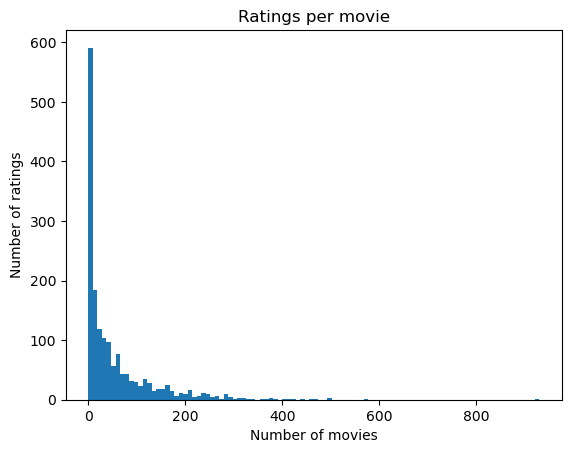

In [33]:
plt.title('Ratings per movie')
plt.xlabel("Number of movies")
plt.ylabel("Number of ratings")
plt.hist(removedOutliers.drop(columns = "userId").count(), bins= 100)

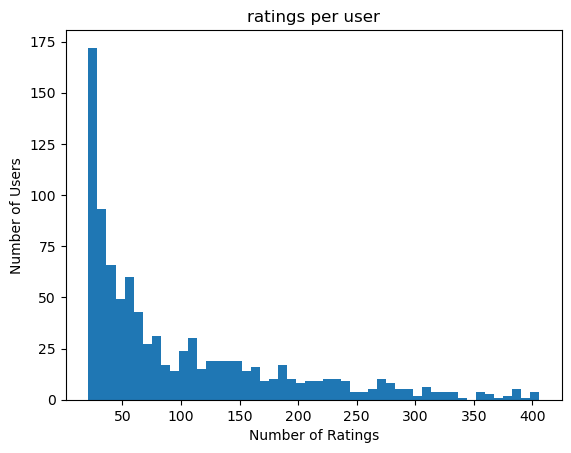

In [35]:
ratingsPerUser = removedOutliers.drop(columns = "userId").notnull().sum(axis=1)

ratingsPerUser.hist(bins=50)
plt.title('ratings per user')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.grid(False)
plt.show()

# Q2: Basic Recomended System